In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# create a sequential model

model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Design a simple RNN solution with pytorch

1.   List item
2.   List item



In [ ]:
# import library
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
# create a synthetic dataset

X,y = [],[]
for i in range(1000):
  x = np.linspace(i * np.pi *2, (i+1) * np.pi *2, 51)
  sine_wave = np.sin(x)
  X.append(sine_wave[:-1])
  y.append(sine_wave[1:])


print(X)
print(y)

Streaming output truncated to the last 5000 lines.
        4.81753674e-01,  3.68124553e-01,  2.48689887e-01,  1.25333234e-01,
        1.89101559e-13, -1.25333234e-01, -2.48689887e-01, -3.68124553e-01,
       -4.81753674e-01, -5.87785252e-01, -6.84547106e-01, -7.70513243e-01,
       -8.44327926e-01, -9.04827052e-01, -9.51056516e-01, -9.82287251e-01,
       -9.98026728e-01, -9.98026728e-01, -9.82287251e-01, -9.51056516e-01,
       -9.04827052e-01, -8.44327926e-01, -7.70513243e-01, -6.84547106e-01,
       -5.87785252e-01, -4.81753674e-01, -3.68124553e-01, -2.48689887e-01,
       -1.25333234e-01, -3.13569003e-13]), array([ 1.25333234e-01,  2.48689887e-01,  3.68124553e-01,  4.81753674e-01,
        5.87785252e-01,  6.84547106e-01,  7.70513243e-01,  8.44327926e-01,
        9.04827052e-01,  9.51056516e-01,  9.82287251e-01,  9.98026728e-01,
        9.98026728e-01,  9.82287251e-01,  9.51056516e-01,  9.04827052e-01,
        8.44327926e-01,  7.70513243e-01,  6.84547106e-01,  5.87785252e-01,
      

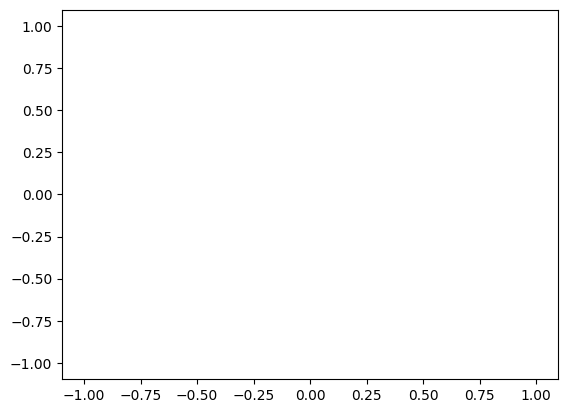

In [ ]:
# plot
import matplotlib.pyplot as plt
plt.plot(X,y)
plt.show()

In [ ]:
# step 1: Convert this list into tensors - pytorch
X = torch.tensor(X).float()
y = torch.tensor(y).float()

print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([1000, 50])
torch.Size([1000, 50])


In [ ]:
# Define the RNN model using pytorch

import torch
import torch.nn as nn

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers,output_size):
        super(SimpleRNN,self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers,batch_first = True)
        self.fc = nn.Linear(hidden_size,output_size)

    def forward(self, x):
        # initialize hidden state with 0
        h0 = torch.zeros(1, x.size(0), self.rnn.hidden_size)
        # pass through the RNN layer
        out, _ = self.rnn(x, h0)
        # pass through the fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# make an object of this class

input_size =1
hidden_size =20
num_layers =1
output_size =1

model = SimpleRNN(input_size, hidden_size, num_layers,output_size)

In [ ]:
# train the model with MSE and optimiszer as Adam
# train the model with MSE and optimiszer as Adam

num_epochs = 100
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# reshape the data for RNN
X_train = X.unsqueeze(2) # shape=(1000,50,1) # Corrected method name to unsqueeze
y_train = y.unsqueeze(2) # shape=(1000,1)    # Corrected method name to unsqueeze

print(X_train,y_train)

tensor([[[ 0.0000e+00],
         [ 1.2533e-01],
         [ 2.4869e-01],
         ...,
         [-3.6812e-01],
         [-2.4869e-01],
         [-1.2533e-01]],

        [[-2.4493e-16],
         [ 1.2533e-01],
         [ 2.4869e-01],
         ...,
         [-3.6812e-01],
         [-2.4869e-01],
         [-1.2533e-01]],

        [[-4.8986e-16],
         [ 1.2533e-01],
         [ 2.4869e-01],
         ...,
         [-3.6812e-01],
         [-2.4869e-01],
         [-1.2533e-01]],

        ...,

        [[ 1.0397e-13],
         [ 1.2533e-01],
         [ 2.4869e-01],
         ...,
         [-3.6812e-01],
         [-2.4869e-01],
         [-1.2533e-01]],

        [[-1.4496e-13],
         [ 1.2533e-01],
         [ 2.4869e-01],
         ...,
         [-3.6812e-01],
         [-2.4869e-01],
         [-1.2533e-01]],

        [[-3.9390e-13],
         [ 1.2533e-01],
         [ 2.4869e-01],
         ...,
         [-3.6812e-01],
         [-2.4869e-01],
         [-1.2533e-01]]]) tensor([[[ 1.2533e-01],
  

In [ ]:
# training loop
history = []
for epoch in range(num_epochs):
    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        history.append(loss.item())



Epoch [10/100], Loss: 0.3095
Epoch [20/100], Loss: 0.1867
Epoch [30/100], Loss: 0.0964
Epoch [40/100], Loss: 0.0746
Epoch [50/100], Loss: 0.0534
Epoch [60/100], Loss: 0.0415
Epoch [70/100], Loss: 0.0325
Epoch [80/100], Loss: 0.0249
Epoch [90/100], Loss: 0.0184
Epoch [100/100], Loss: 0.0123


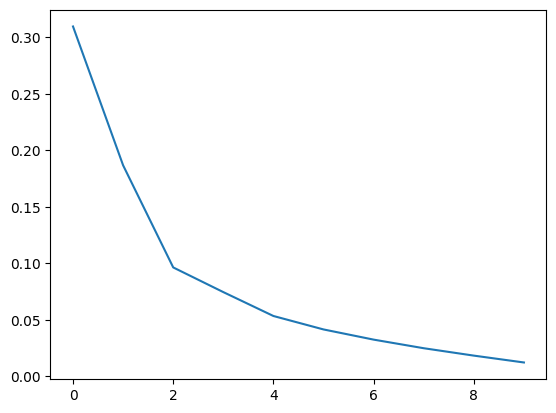

In [ ]:
# plot the result for history
plt.plot(history)
plt.show()


In [ ]:
# make predictions
model.eval()

SimpleRNN(
  (rnn): RNN(1, 20, batch_first=True)
  (fc): Linear(in_features=20, out_features=1, bias=True)
)

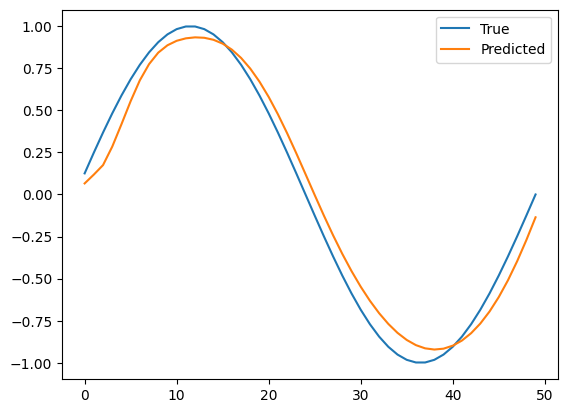

In [ ]:
with torch.no_grad():
    predictions = model(X_train)

# plot the results
plt.plot(y_train.numpy()[0], label='True')
plt.plot(predictions.numpy()[0], label='Predicted')
plt.legend()
plt.show()